In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import pickle

In [2]:
from iteratexgboost import *

In [3]:
get_data()

PERMNO    BIDLO   ASKHI    PRC        VOL    BID    ASK  \
TICKER date                                                             
ADBE   40    75510.0  39.2900  39.935  39.31  3671897.0  39.30  39.31   
       41    75510.0  38.9600  39.880  39.83  2398125.0  39.83  39.84   
       42    75510.0  39.4500  40.470  40.46  2441467.0  40.46  40.47   
       43    75510.0  40.6800  41.490  41.46  4309693.0  41.46  41.47   
       44    75510.0  41.1300  41.770  41.29  2878263.0  41.28  41.29   
...              ...      ...     ...    ...        ...    ...    ...   
ZUO    1506  17382.0  15.5600  16.850  16.36   550036.0  16.37  16.39   
       1507  17382.0  16.3700  17.820  17.81  1092333.0  17.80  17.81   
       1508  17382.0  16.6200  17.920  17.90  1011304.0  17.90  17.91   
       1509  17382.0  17.4100  18.160  17.65  1141001.0  17.65  17.66   
       1510  17382.0  17.7601  18.150  18.14  1125526.0  18.13  18.14   

             OPENPRC   NUMTRD      RETX  ...     RET52     RET53     RET54  \
TICKER date                              ...                                 
ADBE   40      39.54  23806.0 -0.007323  ...  0.000000  0.000000  0.000000   
       41      39.30  17542.0  0.013228  ...  0.000000  0.000000  0.000000   
       42      39.74  16178.0  0.015817  ...  0.000000  0.000000  0.000000   
       43      40.76  27325.0  0.024716  ...  0.000000  0.000000  0.000000   
       44      41.47  20295.0 -0.004100  ...  0.000000  0.000000  0.000000   
...              ...      ...       ...  ...       ...       ...       ...   
ZUO    1506    15.67      NaN  0.017413  ... -0.014544 -0.057656 -0.007505   
       1507    16.68      NaN  0.088631  ... -0.058015 -0.014544 -0.057656   
       1508    17.31      NaN  0.005053  ... -0.036737 -0.058015 -0.014544   
       1509    17.94      NaN -0.013966  ...  0.015143 -0.036737 -0.058015   
       1510    17.95      NaN  0.027762  ...  0.093370  0.015143 -0.036737   

                RET55     RET56     RET57     RET58     RET59     RET60  \
TICKER date                                                               
ADBE   40    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       41    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       42    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       43    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       44    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...               ...       ...       ...       ...       ...       ...   
ZUO    1506  0.010427 -0.000474 -0.016768 -0.070965  0.009611  0.020508   
       1507 -0.007505  0.010427 -0.000474 -0.016768 -0.070965  0.009611   
       1508 -0.057656 -0.007505  0.010427 -0.000474 -0.016768 -0.070965   
       1509 -0.014544 -0.057656 -0.007505  0.010427 -0.000474 -0.016768   
       1510 -0.058015 -0.014544 -0.057656 -0.007505  0.010427 -0.000474   

             modrevtq  
TICKER date            
ADBE   40    6.918291  
       41    6.918291  
       42    6.918291  
       43    6.918291  
       44    6.918291  
...               ...  
ZUO    1506  4.160043  
       1507  4.160043  
       1508  4.160043  
       1509  4.160043  
       1510  4.160043  

[72563 rows x 97 columns]

In [4]:
skip = 160
forward_values = list(range(skip, ONE_YEAR, skip))
if ONE_YEAR not in forward_values:
    forward_values.append(ONE_YEAR)

file_prefix = "models2/iterate_{}".format(skip)
print(file_prefix)

models2/iterate_160


In [5]:
iterated_model(forward_values, file_prefix)

72563it [00:09, 7891.79it/s]
/home/shashvat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


0.49065820718127584
2.0146993739678525


72563it [00:08, 8248.97it/s]
/home/shashvat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


0.5321651719407127
2.074036107985766


In [6]:
models = load_models(forward_values, file_prefix)
print("median: ", evaluate_model(ONE_YEAR, models))

72563it [00:08, 8358.14it/s]


median:  1.155065115233919


In [7]:
print_test_model(ONE_YEAR, models, 100)

72563it [00:08, 8152.26it/s]


revenue predicted diff-factor
[1511.167] [1630.92381902] [0.92657118]
[2419.] [2333.18183052] [1.0367816]
[1383.335] [1106.89738832] [1.24974096]
[282.696] [227.47822827] [1.24273871]
[49.391] [62.86077471] [0.78572051]
[1217.768] [1106.89738832] [1.10016341]
[448.258] [516.48925281] [0.86789415]
[1306.404] [1106.89738832] [1.18023948]
[2291.076] [1731.85053012] [1.32290631]
[1511.167] [1630.92381902] [0.92657118]
[1226.772] [963.44211781] [1.27332195]
[1383.335] [1106.89738832] [1.24974096]
[32.287] [36.06019282] [0.89536404]
[246.716] [214.03416284] [1.15269449]
[1681.646] [1562.74548582] [1.07608438]
[439.584] [288.10276499] [1.5257889]
[51.904] [64.7921695] [0.80108446]
[2419.] [2447.20882452] [0.98847306]
[1398.709] [1106.89738832] [1.26363023]
[79.734] [101.71157114] [0.78392261]
[72.804] [86.77609319] [0.83898684]
[7011.] [5105.2393583] [1.37329506]
[439.584] [288.10276499] [1.5257889]
[43.011] [49.00428947] [0.87769868]
[95.87] [102.70587894] [0.93344218]
[2291.076] [1731.85053

72563it [00:08, 8516.51it/s]


revenue predicted diff-factor


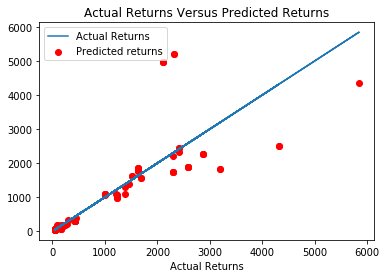

In [8]:
graph_model(ONE_YEAR, models, 100)